<a href="https://colab.research.google.com/github/phamthien300820/CS114.K21/blob/master/Test_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Khai báo thư viện cần dùng
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os
import cv2


In [ ]:
!cd drive
execution_path = os.getcwd()
execution_path

'/content'

In [3]:
data_path='/content/drive/My Drive/Machine_Learning Helmet'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels))

print(label_dict)
print(categories)
print(labels)

{'Không có xe máy': 0, 'Có người đi xe máy': 1}
['Không có xe máy', 'Có người đi xe máy']
[0, 1]


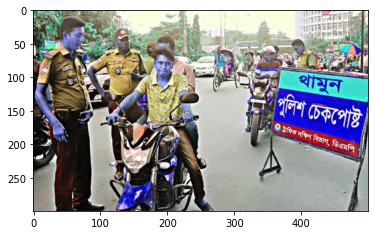

In [ ]:
img = cv2.imread("/content/drive/My Drive/Machine_Learning Helmet/Có người đi xe máy/053142803.jpg")
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  
r=cv2.resize(gray,(224,224)) 
plt.imshow(img)
plt.show()

In [4]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(224,224))  #cogray
            image = preprocess_input(resized)
            #resizing the gray scale into 50x50, since we need a fixed common size for all the images in the dataset
            data.append(image)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)
           

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

Exception: OpenCV(4.1.2) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

Exception: OpenCV(4.1.2) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

Exception: OpenCV(4.1.2) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

Exception: OpenCV(4.1.2) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

Exception: OpenCV(4.1.2) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

Exception: OpenCV(4.1.2) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

Exception: OpenCV(4.1.2) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

Exception: OpenCV(4.

In [ ]:
data

[array([[-0.5686275 , -0.7019608 , -0.70980394, ...,  0.78039217,
          0.1686275 , -0.16862744],
        [-0.58431375, -0.6627451 , -0.6784314 , ..., -0.00392157,
         -0.3490196 , -0.47450978],
        [-0.64705884, -0.64705884, -0.6784314 , ..., -0.6392157 ,
         -0.5137255 , -0.5921569 ],
        ...,
        [-0.16862744, -0.17647058, -0.16862744, ..., -0.5686275 ,
         -0.6313726 , -0.4980392 ],
        [-0.05882353, -0.24705881, -0.24705881, ..., -0.47450978,
         -0.3490196 , -0.78039217],
        [ 0.1686275 , -0.20784312, -0.23137254, ..., -0.79607844,
         -0.47450978, -0.8039216 ]], dtype=float32),
 array([[ 0.41960788,  0.7882353 ,  0.7411765 , ..., -0.5137255 ,
         -0.3960784 , -0.4588235 ],
        [ 0.5137255 ,  0.3176471 ,  0.38823533, ..., -0.49019605,
         -0.4352941 , -0.4823529 ],
        [-0.32549018, -0.5529412 , -0.29411763, ..., -0.49019605,
         -0.46666664, -0.49019605],
        ...,
        [ 0.85882354,  0.4901961 ,  0.3

In [6]:
import numpy as np

data=np.array(data)
data=np.reshape(data,(data.shape[0],224,224,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

Using TensorFlow backend.


In [7]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,new_target,test_size=0.2,random_state=42)

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(
	rotation_range=40,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

In [9]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer

model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
print("[INFO] training head...")
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
H = model.fit(
	aug.flow(train_data, train_target, batch_size=64),
	steps_per_epoch=len(train_data) // 64,
	validation_data=(test_data, test_target),
	validation_steps=len(test_data) // 64,
	epochs=30,callbacks=[checkpoint])

[INFO] training head...
Epoch 1/30
26/26 [==============================] - 742s 29s/step - loss: 0.9000 - accuracy: 0.5468 - val_loss: 0.6960 - val_accuracy: 0.4988
Epoch 2/30
26/26 [==============================] - 721s 28s/step - loss: 0.6737 - accuracy: 0.5861 - val_loss: 0.6231 - val_accuracy: 0.6595
Epoch 3/30
26/26 [==============================] - 742s 29s/step - loss: 0.6542 - accuracy: 0.6046 - val_loss: 0.6087 - val_accuracy: 0.6571
Epoch 4/30
26/26 [==============================] - 691s 27s/step - loss: 0.6508 - accuracy: 0.6195 - val_loss: 0.5919 - val_accuracy: 0.6882
Epoch 5/30
26/26 [==============================] - 713s 27s/step - loss: 0.6434 - accuracy: 0.6117 - val_loss: 0.5970 - val_accuracy: 0.6691
Epoch 6/30
26/26 [==============================] - 710s 27s/step - loss: 0.6344 - accuracy: 0.6548 - val_loss: 0.5750 - val_accuracy: 0.7050
Epoch 7/30
26/26 [==============================] - 686s 26s/step - loss: 0.6235 - accuracy: 0.6373 - val_loss: 0.5612 - val

In [17]:
predIdxs = model.predict(test_data, batch_size=64)

In [18]:
predIdxs = np.argmax(predIdxs)

In [20]:
def plot_learning_curve(history):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.legend(loc='lower right')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.legend(loc='lower right')
    
    plt.show()


In [21]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 200)     2000      
_________________________________________________________________
activation_1 (Activation)    (None, 222, 222, 200)     0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 200)     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 100)     180100    
_________________________________________________________________
activation_2 (Activation)    (None, 109, 109, 100)     0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 100)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 291600)           

In [25]:
# Cài đặt lưu biểu đồ kết quả
TRAINING_PLOT_PATH = os.path.sep.join(["training_plot_val.png"])

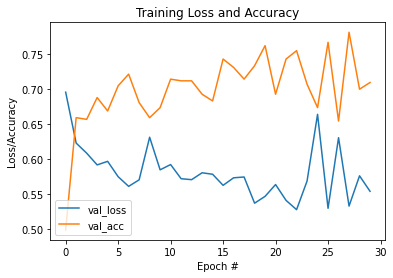

In [26]:
import matplotlib.pyplot as plt

#plt.style.use("ggplot")
plt.figure()
#plt.plot(np.arange(0, 30), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 30), H.history["val_loss"], label="val_loss")
#plt.plot(np.arange(0, 30), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 30), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig(TRAINING_PLOT_PATH)

In [31]:
y_predict=model.predict(test_data)
y_predict=np.argmax(y_predict, axis=1)
y_true=np.argmax(test_target, axis=1)

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_predict, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.88      0.49      0.63       211
           1       0.64      0.93      0.76       206

    accuracy                           0.71       417
   macro avg       0.76      0.71      0.70       417
weighted avg       0.76      0.71      0.70       417



In [ ]:
import cv2,os
from tensorflow.keras.models import load_model
model = load_model("/content/drive/My Drive/model-023.model")
img = cv2.imread("/content/tải xuống (2).jfif")
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           

resized=cv2.resize(gray,(224,224))  

reshaped=np.reshape(resized,(1,224,224,1))
image = preprocess_input(reshaped)

a=model.predict(image)
plt.imshow(img)
plt.show()


if a[0][1] > a[0][0]:
  print('Có xe máy trong hình')
else :
  print('Không có xe máy trong hình')